In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, tree, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import statsmodels.api as sm
import statsmodels.formula.api as smf

    Part 1: 

 Regression analysis of Gapminder data

In [10]:
#Retrieve Gapminder data
data = pd.read_csv("gap.tsv", sep='\t')
display(data)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


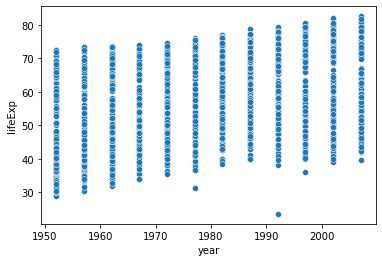

In [11]:
'''
    Exercise 1
    
 Make a scatter plot of life expectancy across time
'''
#Scatter plot of life expectancy by year for every country in the data set
sns.scatterplot(x='year', y='lifeExp', data=data)
_ = plt.show()

    Question 1
    
 Is there a general trend (e.g., increasing or decreasing) for life expectancy across  
 time? Is this trend linear? (answer this qualitatively from the plot)

    Answer
 The average life expectancy world wide steadily increases over time. This creates a 
 positive, linear trend. Furthermore, you can see that in first thirty years a majority 
 of countries had below average life expectancy, but within the last thirty years a 
 majority of countries have an above average life expectancy.
 
 

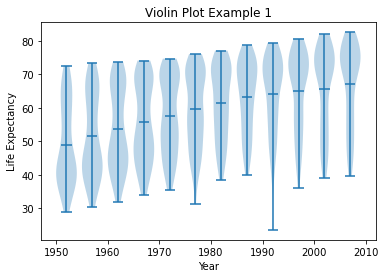

In [12]:
life_expr_per_year = []
years = data.year.unique()
#Get list of a list of every country's life expectancy for each year
for year in years:
    year_data = data.loc[data['year'] == year]
    year_lst = []
    for index, row in year_data.iterrows():
        year_lst.append(row['lifeExp'])

    life_expr_per_year.append(year_lst)


fig, ax = plt.subplots()
#Violin plot of life expectancy by year for every country in the data set
ax.violinplot(life_expr_per_year,years,widths=4,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Life Expectancy")
ax.set_title("Violin Plot Example 1")
fig.savefig("violin_year_lifeExp.png")
_ = plt.show()

    Question 2
    
 How would you describe the distribution of life expectancy across countries for individual years? 
     -Is it skewed, or not? 
     -Unimodal or not? 
     -Symmetric around it’s center?
     
     Answer
  In 1952, the distribution is left skewed and is bimodal. This indicates that
 the majority of countries have a lower life expectancy than the mean and that
 there are many countries with a high life expectancy. Over the next three
 time periods, the data becomes more bimodal, as most countries have very low
 or very high life expectancy. However, beginning in 1977, the data becomes 
 significantly more unimodal and right skewed. This is most apparent in years
 like 1982 and 1992, as the vast majority of countries now have a very high
 life expectancy. By 2007, there is significant right skewness and life 
 expectancy plateaus around 70 - 80 years of age.

    Question 3
    
 Suppose I fit a linear regression model of life expectancy vs. year 
 (treating it as a continuous variable), and test for a relationship between 
 year and life expectancy, will you reject the null hypothesis of no 
 relationship? 
 (do this without fitting the model yet. I am testing your intuition.)

    Answer
 I would reject the null because there is a clear, positive relationship 
 between year and average life expectancy. As time increases, people live 
 longer on average.


    Question 4
    
 What would a violin plot of residuals from the linear model in Question 3 vs.
 year look like? (Again, don’t do the analysis yet, answer this intuitively)

     Answer

 The first few years would be left skewed but over time the plots of the 
 residuals would become more right skewed. I'd expect this since the majority 
 of countries have seen an increase in life expectancy over time.


    Question 5
    
 According to the assumptions of the linear regression model, what should 
 that violin plot look like? That is, consider the assumptions the linear 
 regression model you used assumes (e.g., about noise, about input 
 distributions, etc); do you think everything is okay?

    Answer
 
 We assumed that the data comes from a normal distribution, so we'd
 expect that the violin plots reflect this by being symmetric around  the mean for each year. 
 


In [13]:
'''
    Exercise 2
    
 Fit a linear regression model using, e.g., the LinearRegression function 
 from Scikit-Learn or the closed-form solution, for life expectancy vs. 
 year (as a continuous variable). There is no need to plot anything here,
 but please print the fitted model out in a readable format.
'''

x_lst = []
y_lst = []
#Get year as our x variable and life expectancy as our y variable
for index, row in data.iterrows():
    x_lst.append(row['year'])
    y_lst.append(row['lifeExp'])

#Reshape the data for model
x = np.array(x_lst).reshape(1704, 1)
y = np.array(y_lst).reshape(1704, 1)

#Find regression line
reg = linear_model.LinearRegression()
reg.fit(x, y)
coef = reg.coef_
intercept = reg.intercept_

#Print slope and intercept of the line
print("Coefficient of regression line: " + str(reg.coef_[0][0]))
print("Y-intercept of regression line: " + str(reg.intercept_[0]))

Coefficient of regression line: 0.32590382763715164
Y-intercept of regression line: -585.6521874415445


    Question 6
    
 On average, by how much does life expectancy increase every year around the 
 world?


    Answer

 Every year, average life expectancy increase by 0.325 years



    Question 7

 Do you reject the null hypothesis of no relationship between year and life 
 expectancy? Why?
 
     Answer
     
 I do reject the null on the basis that the correlation coefficient of 0.325
 is weak given the large sample size of the data. Additionally, the change
 in left skewness to right skewness indicates a positive change in life 
 expectancy over time.
   

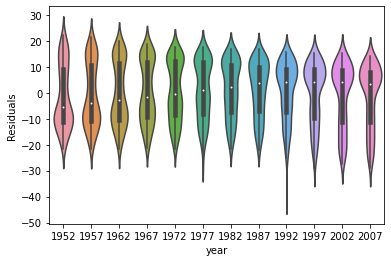

In [14]:
'''
    Exercise 3

 Make a violin plot of residuals vs. year for the linear model from 
 Exercise 2.
'''
#For each row, calculate the residual by substracting (intercept + slope * year) from the recorded life expectancy
data['Residuals'] = data['lifeExp'] - (reg.intercept_ + reg.coef_[0]*data['year'])

#Violin plot of residuals by year for every country in the data set
_ = sns.violinplot(x= 'year', y='Residuals', data=data, bw=0.3)
_ = plt.show()

    Question 8

 Does the plot of Exercise 3 match your expectations (as you answered 
 Question 4)?
 
    Answer
     
 Yes. The plots begin left skewed and become right skewed over time and my 
 prediction said this would happen.
 

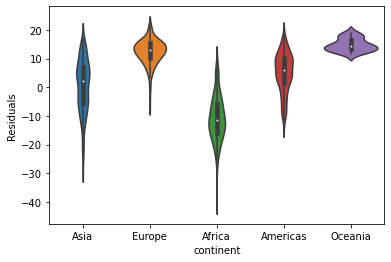

In [15]:
'''
    Exercise 4
    
 Make a boxplot (or violin plot) of model residuals vs. continent.
'''
#Violin plot of residual by continent for every country in the data set
sns.violinplot(x='continent', y='Residuals', data=data)
_ = plt.show()


    Question 9
    
 Is there a dependence between model residual and continent? If so, what would
 that suggest when performing a regression analysis of life expectancy across 
 time?
 
     Answer
     
 There is a relation between continent and residual life expectancy, as continents like Europe and Oceania 
 have much higher average life expectancy than Africa, where as Asia and the Americas are somewhere inbetween. 
 Thus, we should create regressions for each continent.
'''

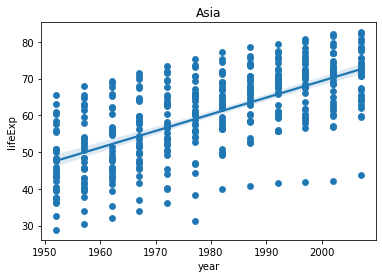

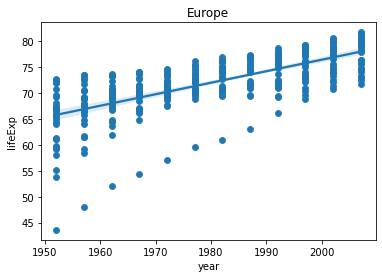

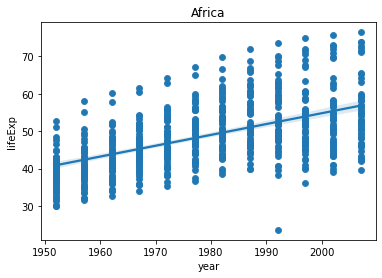

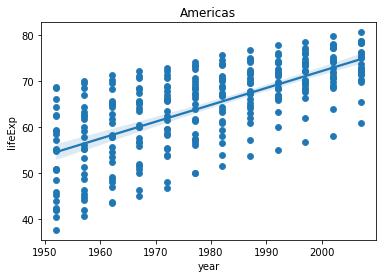

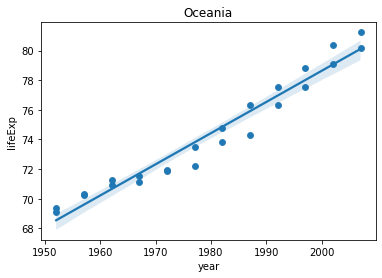

In [16]:
'''
    Exercise 5
    
 As in the Moneyball project, make a scatter plot of life expectancy vs. year,
 grouped by continent, and add a regression line. The result here can be given
 as either one scatter plot per continent, each with its own regression line,
 or a single plot with each continent's points plotted in a different color,
 and one regression line per continent's points. The former is probably easier
 to code up.
'''
life_exp_per_continent = []
continents = data.continent.drop_duplicates()
#Get the life expectancy by year for each country in a given continent for every continent
for continent in continents:
    life_exp_per_continent.append((data.loc[data['continent'] == continent]).reset_index())

#For each continent, show a scatter plot of life expectancy over time and fit a regression line
for cont in life_exp_per_continent:
    sns.scatterplot(x='year', y='lifeExp', data=cont).set_title(str(cont.at[0, 'continent']))
    sns.regplot(x="year", y="lifeExp", data=cont)
    _ = plt.show()


    Question 10
    
 Based on this plot, should your regression model include an interaction term
 for continent and year? Why?
 
    Answer
    
 Our regressional model should include some interaction term for each continent and year given how different the slope and intercept are for each continent

In [17]:
'''
    Exercise 6

 Fit a linear regression model for life expectancy including a term for an 
 interaction between continent and year. Print out the model in a readable 
 format, e.g., print the coefficients of the model (no need to plot). Hint: 
 adding interaction terms is a form of feature engineering, like we 
 discussed in class (think about, e.g., using (a subset of) polynomial 
 features here).
'''
#Use OLS regression to fit the data to
mod = smf.ols(formula = 'lifeExp ~ year * continent', data = data)
res = mod.fit()
print(res.summary())

#Print test results using the given test
formula = 'year:continent[T.Americas] = 0, year:continent[T.Asia]= 0,year:continent[T.Europe]= 0,year:continent[T.Oceania]= 0, year=0'
t_test_results = res.t_test(formula)
print(t_test_results)

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:22:44   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

    Question 11
    
 Are all parameters in the model significantly (in the p-value sense) 
 different from zero? If not, which are not significantly different from zero?
 Other libraries (statsmodels or patsy may help you solve this problem)

    Answer
    
 The model shows that the Oceania parameter, c3, contains the value of zero in it's confidence interval while all 
 other parameters don't contain zero in their intervals. This indicates that Oceania's parameter is the only one 
 not significantly different from zero


    Question 12
    
 On average, by how much does life expectancy increase each year for each 
 continent? (Provide code to answer this question by extracting relevant 
 estimates from model fit)

    Answer
    
 For Africa, life expectancy increases by 0.290 every year. For the Americas, life expectancy increases by 0.078 every year. For Asia, life expectancy increases by 0.164 every year. For Europe, life expectancy decreases by 0.068 every year. For Oceania, life expectancy decreases by 0.079 every year


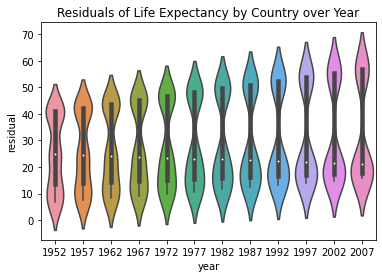

In [18]:
'''
    Exercise 7
    
 Make a residuals vs. year violin plot for the interaction model. 
 Comment on how well it matches assumptions of the linear regression model
'''
#Using the results from the OLS regression, we set the new residual at index i to be (slope' * year + intercept')
def set_residual(data, res, param1, param2, i):
    data.at[i, 'residual'] = res.params[param1]*data.at[i, 'year'] + res.params[param2]

#For each row, set the residual using the appropriate parameters given a row's continent 
for i, row in data.iterrows():
    # if data.at[i, 'continent'] == "Africa":
    #data.at[i, 'residual'] = res.params[5]*data.at[i, 'year'] + res.params[0]
    param1 = 5
    param2 = 0
    
    if data.at[i, 'continent'] == "Oceania":
        #data.at[i, 'residual'] = res.params[9]*data.at[i, 'year'] + res.params[4]
        param1 += 4
        param2 += 4
    elif data.at[i, 'continent'] == "Americas":
        #data.at[i, 'residual'] = res.params[6]*data.at[i, 'year'] + res.params[1]
        param1 += 1
        param2 += 1
    elif data.at[i, 'continent'] == "Asia":
        #data.at[i, 'residual'] = res.params[7]*data.at[i, 'year'] + res.params[2]
        param1 += 2
        param2 += 2
    elif data.at[i, 'continent'] == "Europe":
        #data.at[i, 'residual'] = res.params[8]*data.at[i, 'year'] + res.params[3]
        param1 += 3
        param2 += 3
    set_residual(data, res, param1, param2, i)

#Violin plot of residual by year for every country in the data set using the residuals obtained from the OLS results
sns.violinplot(x = 'year', y = 'residual', data = data)
plt.title("Residuals of Life Expectancy by Country over Year")
_ = plt.show()

    Part 2: 

 Classification

In [50]:
#I will be using the iris data set
iris = load_iris()

#Set the X and y variables and perform train_test_split using 35 percent of the data
X, y = iris.data, iris.target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

#Initialize Decsion Tree and Random Forest classifiers
clf = tree.DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [51]:
''' Decision Tree Classifier '''
#Fit the CLF using the training data
clf.fit(x_train, y_train)

#Predict using the x testing data
dt_predicted_data = clf.predict(x_test)

#Print results in accuracy of y testing data to predicted data from the decision tree
print(metrics.classification_report(y_test, dt_predicted_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.76      0.87        17
           2       0.83      1.00      0.90        19

    accuracy                           0.92        53
   macro avg       0.94      0.92      0.92        53
weighted avg       0.94      0.92      0.92        53



    Analysis
   
 Using the iris data set, I will compare decision tree classification 
 and random forest classification by importing sklearn packages. I 
 will test using holdout validation. The iris data set contains three 
 species of flowers and their various attributes such as pedal length,
 sepal length, etc. Using these features we can attempt to classify 
 the flower. For holdout validation, I will split 35 percent of the 
 data into training data while the other 65 percent is testing data. 
 Since my dataset is small, I think this will help the test to be more accurate.
 
 As you can see, the result of the decision tree shows that we can 
 correctly identify a flower using attributes as input with a high
 degree of accuracy.

In [52]:
''' Random Forest Classifier'''
#Fit the RF using the training data
rfc.fit(x_train, y_train)

#Predict using the x testing data
rf_predicted_data = rfc.predict(x_test)

#Print results in accuracy of y testing data ot predicted data from the random forest 
print(metrics.classification_report(y_test, rf_predicted_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.82      0.90        17
           2       0.86      1.00      0.93        19

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.94        53
weighted avg       0.95      0.94      0.94        53



    Analysis
    
 The results of the Random Forest show a very high degree of accuracy. In 
 fact, the Random Forest classifier outperformed the Decision Tree in every 
 metric.